* https://drive.google.com/file/d/1todwi6NRInDwkFY24sSneP0c7RGTNTms/view?usp=sharing

#### konlpy 정상동작 확인

In [1]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs("KoNLPy가 정상 설치되었는지 확인 중입니다."))


['KoNLPy', '가', '정상', '설치', '되었는지', '확인', '중', '입니다', '.']


In [2]:
import jpype
if not jpype.isJVMStarted():
    jpype.startJVM()
print("JPype와 JVM이 정상 작동 중입니다.")


JPype와 JVM이 정상 작동 중입니다.


In [3]:
import pandas as pd

#### 데이터 준비

In [4]:
# ------------------------------
#   파일 경로
# ------------------------------
data_file = 'data\\뉴스댓글\\나이키.csv'

# ------------------------------
#   불러올 컬럼명
# ------------------------------
col_name = 'review'

# ------------------------------
#   데이터 불러오기
# ------------------------------
data = pd.read_csv(data_file).loc[:,col_name].dropna()

# ------------------------------
#   내용 컬럼을 하나의 문장으로 합치기
# ------------------------------
text = ' '.join(data)
text

'발볼이 넓은사람은 나이키가 불편해서 안신게됨 난 나이키만 신는데? 신발은 나이키 디자인으로 신는거지 발이 편하진않음 발이 더 편하거나 디자인이 좋거나 하는 신발들이 많아졌지 사실 경쟁력이 없잖아 뉴발란스가 확실히 편해요. 이번에 아디다스 삼바도 사봤는데 나이키보다는 편하더라고요. 나이키는 발볼이 너무 좁아요 ㅠㅠ 발볼이 너무좁다 허구한날 한정판이라고 콜라보네뭐네 출시소식만 주구장창 뿌리고 막상 매장가면 그림자구경도 못하는 신발들로 기만하더니 꼴좋타 ㅋㅋㅋ 잘나가던 시절에 충성 고객들이 나이가 들어버렸어...그러다 보니 브랜드도 같이 늙어버림 스케쳐스 한번 신어보세요. 착용감 최고고 디자인도 정말 굿이예요. 2개 있어요. 솔직히 나이키가 편하다고요..????진심 레알이세요??ㅋㅋ그똑같은 가격대로 아디다스,뉴발신는게 훨 더 편하지 아니 무슨 운동화를 칼발같이 만들어놨어…발볼에 맞춰서 심을려면 한치수 크게 사야하는데 그렇게 사면 뒷꿈치가 남음…그래서 끈을 당겨서 묶게됨 그러면 또 발볼이 불편해짐 제목다는 꼬라지보소... ㅉㅉㅉ “요새 누가 국민일보 봐요” ㅋㅋㅋㅋ 기분좋지? ㅎ 나이키 많이 신던데 아시아인과 아시아환경적측면을 많이 고려하지않는 브랜드같음.옷은 절대적으로크고 길고 신발은 좁고 길고 . 그걸또 힙하다고 입는 애들ㅋㅋ 나이키는 가격대비 품질이 엉망...나이키보다 싸고 품질좋은 물건이 수두룩한데 모델에 거액을 지불하고 품질경쟁을 하려니 가성비가 떨어질수밖에 없지. PC하다가 망하겠네 솔직히 메이커 값임. 이넘들 인체공학적 편안함 같은건 신경도 안쓰는거 같은데. 그저께 나이키 슬리퍼 샀는데 역시나 그지같은 착용감ㅜㅜ 동양인은 발볼 넓어서 나이키랑은 잘 안맞는듯 유행은 결국 돌고 돈다. 저가 매수 적기임!! 아식스가 대세인듯 옷이나 신발제질도 예전보다 질도많이떠러졌고 가격은 더올랐으니 구입하는 사람들이 저조할수밖에 디자인자체도 많이 못미치는것같음!! 흑인 뚱녀 모델 파급력이 큼 pc 폐미묻으면 외국에서도 죄다 나락가고있는데 꾸역꾸역 정신병 사상 강요하는 애들

#### 문자열 정제
* 한글만 남기기

In [5]:
import re
clean_text = re.sub(r'[^가-힇\s]', ' ', text)
clean_text

'발볼이 넓은사람은 나이키가 불편해서 안신게됨 난 나이키만 신는데  신발은 나이키 디자인으로 신는거지 발이 편하진않음 발이 더 편하거나 디자인이 좋거나 하는 신발들이 많아졌지 사실 경쟁력이 없잖아 뉴발란스가 확실  편해요  이번에 아디다스 삼바도 사봤는데 나이키보다는 편하더라고요  나이키는 발볼이 너무 좁아요    발볼이 너무좁다 허구한날 한정판이라고 콜라보네뭐네 출시소식만 주구장창 뿌리고 막상 매장가면 그림자구경도 못하는 신발들로 기만하더니 꼴좋타     잘나가던 시절에 충성 고객들이 나이가 들어버렸어   그러다 보니 브랜드도 같이 늙어버림 스케쳐스 한번 신어보세요  착용감 최고고 디자인도 정말 굿이예요   개 있어요  솔직  나이키가 편하다고요      진심 레알이세요    그똑같은 가격대로 아디다스 뉴발신는게 훨 더 편하지 아니 무슨 운동화를 칼발같이 만들어놨어 발볼에 맞춰서 심을려면 한치수 크게 사야하는데 그렇게 사면 뒷꿈치가 남음 그래서 끈을 당겨서 묶게됨 그러면 또 발볼이 불편해짐 제목다는 꼬라지보소         요새 누가 국민일보 봐요       기분좋지    나이키 많이 신던데 아시아인과 아시아환경적측면을 많이 고려하지않는 브랜드같음 옷은 절대적으로크고 길고 신발은 좁고 길고   그걸또  하다고 입는 애들   나이키는 가격대비 품질이 엉망   나이키보다 싸고 품질좋은 물건이 수두룩한데 모델에 거액을 지불하고 품질경쟁을 하려니 가성비가 떨어질수밖에 없지    하다가 망하겠네 솔직  메이커 값임  이넘들 인체공학적 편안함 같은건 신경도 안쓰는거 같은데  그저께 나이키 슬리퍼 샀는데 역시나 그지같은 착용감   동양인은 발볼 넓어서 나이키랑은 잘 안맞는듯 유행은 결국 돌고 돈다  저가 매수 적기임   아식스가 대세인듯 옷이나 신발제질도 예전보다 질도많이떠러졌고 가격은 더올랐으니 구입하는 사람들이 저조할수밖에 디자인자체도 많이 못미치는것같음   흑인 뚱녀 모델 파급력이 큼    폐미묻으면 외국에서도 죄다 나락가고있는데 꾸역꾸역 정신병 사상 강요하는 애들

* 블용어 사전

In [6]:
# -----------------------
# 외부 불용어 사전
# -----------------------

import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/refs/heads/master/stopwords-ko.txt"
response = requests.get(url)

# 줄 단위로 나누고, 공백 제거 후 리스트 생성
external_stopwords = [line.strip() for line in response.text.splitlines() if line.strip()]

# -----------------------
# 커스터마이즈 불용어 사전
# -----------------------
custom_stopwords = []


# -----------------------
# 최종 불용어 사전
#   외부 불용어 사전, 커스터마이즈 불용어사전 합치고 중복 제거
# -----------------------
stopwords = set(external_stopwords + custom_stopwords)

#### 명사 추출 및 불용어 제거
* KoNLPy라이브러리의 형태소분석기 사용
* KoNLPy 사용 시 자바(JDK)가 필요할 수 있으니, 환경에 따라 JDK 설치 및 JAVA_HOME 환경변수 설정이 필요할 수도 있습니다​

In [7]:
# ----------------------------
# 형태소 분석기로 명사만 추출
# ----------------------------

from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(clean_text)

# ----------------------------
# 한글자인 명사와 불용어 제거
# ----------------------------

filtered_nouns = [
    n for n in nouns
    if len(n) > 1 and n not in stopwords
]

#### 단어 빈도 계산
* 리스트에서 각 항목이 몇 번 나오는지 카운트

In [8]:
from collections import Counter

counter = Counter(filtered_nouns)  # 명사 리스트를 Counter 객체로 변환
print(counter.most_common(10))

[('나이키', 324), ('신발', 111), ('디자인', 63), ('브랜드', 50), ('요즘', 49), ('아디다스', 44), ('가격', 42), ('발볼', 39), ('뉴발', 37), ('운동화', 34)]


#### 상위명사 추출

In [20]:
top100 = dict(counter.most_common(100))  # 가장 많이 등장한 50개 단어만 추출하여 딕셔너리 생성
top100.pop('나이키',None)
top100.pop('신발',None)
top100.pop('브랜드',None)

50

#### 한글 폰트 설정 및 워드클라우드 시각화

C:\Users\User\AppData\Local\Temp\ipykernel_14996\3031041341.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlGn')


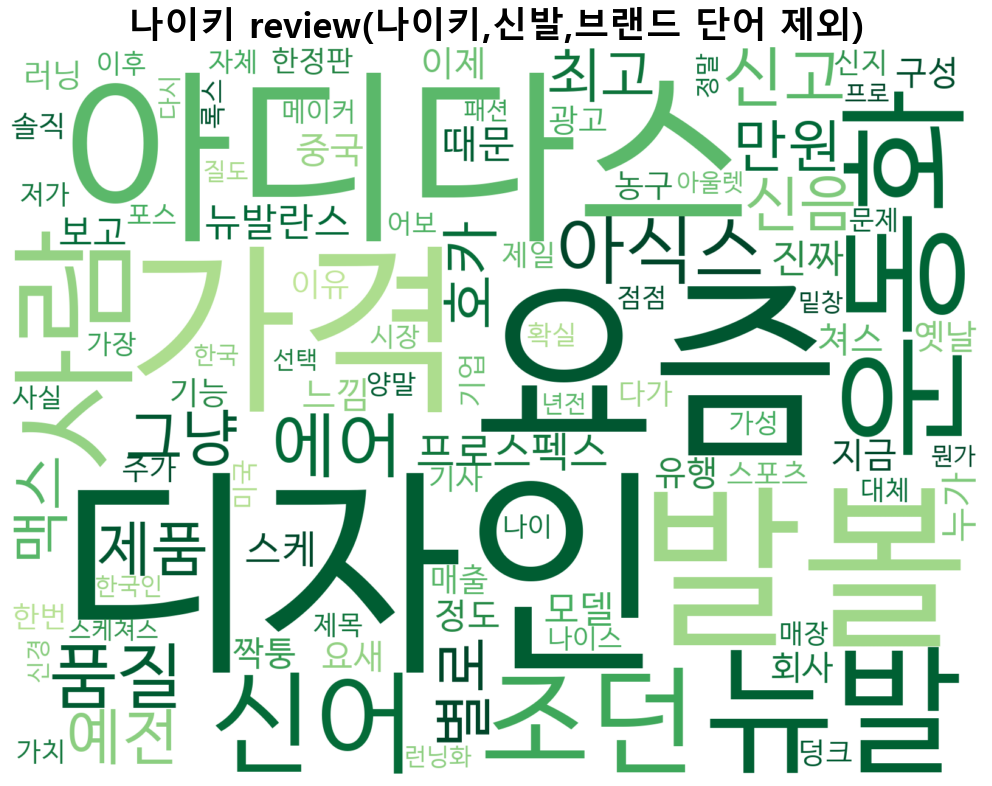

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

#그래프 스타일
plt.style.use('ggplot')

import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'  # 한글 폰트 경로

cmap = cm.get_cmap('YlGn')

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    value = random.uniform(0.3, 1.0)
    r, g, b, _ = cmap(value)
    return f"rgb({int(r*255)}, {int(g*255)}, {int(b*255)})"

wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600,
    color_func=color_func,
    max_font_size=180,
    scale=2
)

# 워드클라우드 생성
cloud = wc.generate_from_frequencies(top100)

# 시각화 + 타이틀
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

# ✅ 타이틀 추가 (더 크고 위쪽에 배치)
plt.title("나이키 review(나이키,신발,브랜드 단어 제외)", fontsize=26, color='black', weight='bold')
plt.subplots_adjust(top=0.88)  # 타이틀 위치 조정 (더 위로)

plt.tight_layout(pad=1)
plt.show()


In [11]:
from matplotlib import font_manager

# 시스템에 설치된 모든 폰트 리스트 가져오기
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 한글 폰트만 필터링 (이름에 'Malgun', 'Gothic', 'Nanum', 'Apple' 등 포함)
korean_fonts = [f for f in font_list if 'malgun' in f.lower() or
                                         'gothic' in f.lower() or
                                         'nanum' in f.lower() or
                                         'apple' in f.lower()]

# 결과 확인
for font in korean_fonts:
    print(font)


C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunpenR.ttf
C:\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundEB.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothic.ttf
C:\Windows\Fonts\Hancom Gothic Regular.ttf
C:\Windows\Fonts\NanumGothic.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquare.ttf
C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBrush.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareL.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundR.ttf
C:\Windows\Fonts\malgunsl.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\Gong Gothic Bold.ttf
C:\Windows\Fonts\GOTHICI.TTF
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundL.ttf
C:\Windows\Fonts\Hancom Gothic Bold.ttf
C:\Windows\Fonts\msgothic.ttc
